# Plotting Cross-Validated Predictions On The Boston Dataset

This notebook illustrates finding feature importance in the Boston dataset. It is a version of the Scikit-Learn example [Plotting Cross-Validated Predictions](http://scikit-learn.org/stable/auto_examples/plot_cv_predict.html#sphx-glr-auto-examples-plot-cv-predict-py).

The main point it shows is using pandas structures throughout the code, and integrate nicely with seaborn.

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import model_selection
import seaborn as sns
sns.set_style('whitegrid')
sns.despine()

from ibex import trans
from ibex.sklearn import linear_model as pd_linear_model
from ibex.sklearn import preprocessing as pd_preprocessing
from ibex.sklearn import ensemble as pd_ensemble
from ibex.sklearn import model_selection as pd_model_selection
from ibex.xgboost import XGBRegressor as PdXGBRegressor

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Loading The Data 

First we load the dataset into a ``pandas.DataFrame``.

In [2]:
dataset = datasets.load_boston()
boston = pd.DataFrame(dataset.data, columns=dataset.feature_names)
features = dataset.feature_names
boston['price'] = dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
print(datasets.load_boston()['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
boston.B.value_counts()

396.90    121
395.24      3
393.74      3
393.23      2
394.72      2
396.21      2
395.69      2
396.06      2
395.63      2
395.60      2
392.78      2
391.34      2
395.58      2
377.07      2
394.12      2
395.11      2
376.14      2
395.56      2
389.71      2
390.94      2
341.60      2
388.45      2
393.37      2
393.68      2
392.80      2
393.45      2
395.62      2
374.71      2
392.20      1
394.62      1
         ... 
392.85      1
384.54      1
384.07      1
376.94      1
394.95      1
24.65       1
334.40      1
285.83      1
387.89      1
379.38      1
386.40      1
379.41      1
379.70      1
390.07      1
382.84      1
393.25      1
354.70      1
395.93      1
362.25      1
318.75      1
395.01      1
43.06       1
391.98      1
354.31      1
388.08      1
394.46      1
288.99      1
390.30      1
248.31      1
390.50      1
Name: B, Length: 357, dtype: int64

## Building The Cross Validated Predictions

We will use a linear predictor, and a random forest predictor. 

In [5]:
linear_y_hat = pd_model_selection.cross_val_predict(
    pd_linear_model.LinearRegression(),
    boston[features],
    boston.price)
linear_y_hat.head()

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


0    30.598898
1    24.489412
2    29.747524
3    28.648380
4    27.552867
dtype: float64

In [6]:
linear_cv= pd.concat([linear_y_hat, boston.price], axis=1)
linear_cv['type'] = 'linear'
linear_cv.columns = ['y_hat', 'y', 'regressor']
linear_cv.head()

,y_hat,y,regressor
0,30.598898,24.0,linear
1,24.489412,21.6,linear
2,29.747524,34.7,linear
3,28.648380,33.4,linear
4,27.552867,36.2,linear


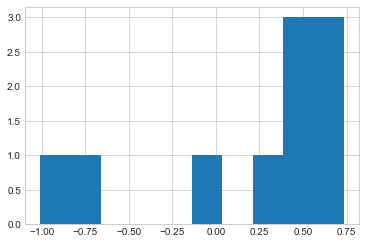

In [7]:
hist(pd_model_selection.cross_val_score(
    pd_linear_model.LinearRegression(),
    boston[features],
    boston.price, 
    cv=10));

In [8]:
rf_y_hat = pd_model_selection.cross_val_predict(
    pd_ensemble.RandomForestRegressor(),
    boston[features],
    boston.price)
rf_cv= pd.concat([rf_y_hat, boston.price], axis=1)
rf_cv['type'] = 'rf'
rf_cv.columns = ['y_hat', 'y', 'regressor']

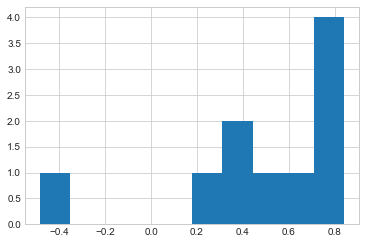

In [9]:
hist(pd_model_selection.cross_val_score(
    pd_ensemble.RandomForestRegressor(n_estimators=1000),
    boston[features],
    boston.price,
    cv=10));

In [10]:
PdXGBRegressor?

In [11]:
xgbrf_y_hat = pd_model_selection.cross_val_predict(
    PdXGBRegressor(),
    boston[features],
    boston.price)
xgbrf_cv= pd.concat([xgbrf_y_hat, boston.price], axis=1)
xgbrf_cv['type'] = 'xgbrf'
xgbrf_cv.columns = ['y_hat', 'y', 'regressor']

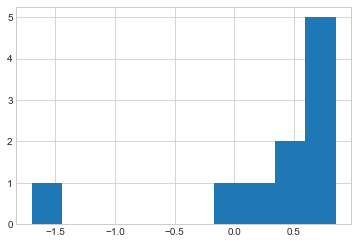

In [12]:
hist(pd_model_selection.cross_val_score(
    PdXGBRegressor(n_estimators=2000, subsample=1, min_child_weight=0),
    boston[features],
    boston.price,
    cv=10));

In [13]:
PdXGBRegressor?

In [14]:
cvs = pd.concat([linear_cv, rf_cv, xgbrf_cv])

## Plotting The Cross-Validated Predictions

Finally, we can plot the results:

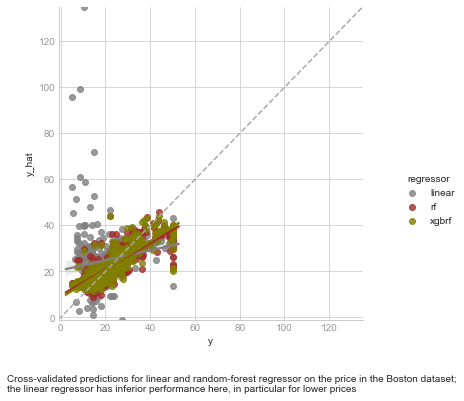

In [15]:
min_, max_ = cvs[['y_hat', 'y']].min().min(), cvs[['y_hat', 'y']].max().max()
sns.lmplot(
    x='y', 
    y='y_hat', 
    hue='regressor', 
    data=cvs,
    palette={'linear': 'grey', 'rf': 'brown', 'xgbrf': 'olive'});
plot(np.linspace(min_, max_, 100), np.linspace(min_, max_, 100), '--', color='darkgrey');
tick_params(colors='0.6')
xlim((min_, max_))
ylim((min_, max_))
figtext(
    0, 
    -0.1, 
    'Cross-validated predictions for linear and random-forest regressor on the price in the Boston dataset;\n'
    'the linear regressor has inferior performance here, in particular for lower prices');